In [1]:
import pytorch_lightning as pl
from modules.lifter_2d_3d.model.linear_model.lit_linear_model import LitSimpleBaselineLinear as LitModel
from modules.experiments.dataset import (
    construct_synthetic_cabin_ir_1m_v2, synthetic_cabin_ir_1m_v2_dataset_root_path, synthetic_cabin_ir_1m_v2_image_root_path
)
from modules.utils.convention import get_saved_model_path
from modules.experiments.experiment import Experiment

pl.seed_everything(1234)

viewpoints = ['Rear_Mirror', 'OMS_01']

constructed_loader = construct_synthetic_cabin_ir_1m_v2(
    dataset_name='synthetic_cabin_ir_1m',
    dataset_root_path=synthetic_cabin_ir_1m_v2_dataset_root_path,
    viewpoints=viewpoints,
    keypoint_2d_folder='annotations',
    keypoint_2d_file_prefix='person_keypoints',
    bbox_file_predix='ground_truth_human_detection',
    is_gt_2d_pose=True
)
saved_model_path = get_saved_model_path(
    model_name=LitModel.__name__,
    model_suffix='_'.join(viewpoints),
    trained_dataset_name=constructed_loader['dataset_name'],
    trained_datasubset_name=constructed_loader['datasubset_name'],
)
experiment = Experiment(
    LitModel=LitModel,
    constructed_loader=constructed_loader,
    saved_model_path=saved_model_path,
    model_parameters=dict(
        exclude_ankle=True,
        exclude_knee=True
    )
)

experiment.setup()
experiment.train()

Global seed set to 1234
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


train_dataset 150001 val_dataset 75000 test_dataset 59375
create new LitSimpleBaselineLinear model
train_dataset 150001 val_dataset 75000 test_dataset 59375
create new LitSimpleBaselineLinear model


Missing logger folder: saved_lifter_2d_3d_model/LitSimpleBaselineLinear/synthetic_cabin_ir_1m/gt/Rear_Mirror_OMS_01/lightning_logs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type          | Params
----------------------------------------
0 | model | BaselineModel | 4.3 M 
----------------------------------------
4.3 M     Trainable params
0         Non-trainable params
4.3 M     Total params
17.105    Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

check #0
val MPJPE from: 74944 samples : 2145.8559036254883


Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

check #1
training loss from 11715 batches: 166.20835209256606
val MPJPE from: 74944 samples : 72.0641165971756


Validation: 0it [00:00, ?it/s]

check #2
training loss from 11715 batches: 103.90760472479205
val MPJPE from: 74944 samples : 67.89255887269974


Validation: 0it [00:00, ?it/s]

check #3
training loss from 11715 batches: 98.8041594363765
val MPJPE from: 74944 samples : 64.72327560186386


Validation: 0it [00:00, ?it/s]

check #4
training loss from 11715 batches: 95.78479314799294
val MPJPE from: 74944 samples : 62.79074400663376


Validation: 0it [00:00, ?it/s]

check #5
training loss from 11715 batches: 93.627355948275
val MPJPE from: 74944 samples : 61.33105978369713


Validation: 0it [00:00, ?it/s]

check #6
training loss from 11715 batches: 92.03375502371452
val MPJPE from: 74944 samples : 61.46566569805145


Validation: 0it [00:00, ?it/s]

check #7
training loss from 11715 batches: 90.848382604692
val MPJPE from: 74944 samples : 60.021769255399704


Validation: 0it [00:00, ?it/s]

check #8
training loss from 11715 batches: 89.8491127536534
val MPJPE from: 74944 samples : 60.00782176852226


Validation: 0it [00:00, ?it/s]

check #9
training loss from 11715 batches: 89.08921503455936
val MPJPE from: 74944 samples : 59.9956177175045


Validation: 0it [00:00, ?it/s]

check #10
training loss from 11715 batches: 88.49164617656899
val MPJPE from: 74944 samples : 59.29085984826088


Validation: 0it [00:00, ?it/s]

check #11
training loss from 11715 batches: 87.94589001451655
val MPJPE from: 74944 samples : 59.14241448044777


Validation: 0it [00:00, ?it/s]

check #12
training loss from 11715 batches: 87.59779276129937
val MPJPE from: 74944 samples : 58.570746332407


Validation: 0it [00:00, ?it/s]

check #13
training loss from 11715 batches: 87.2035796691656
val MPJPE from: 74944 samples : 58.882277458906174


Validation: 0it [00:00, ?it/s]

check #14
training loss from 11715 batches: 86.91189415145521
val MPJPE from: 74944 samples : 58.72371792793274


Validation: 0it [00:00, ?it/s]

check #15
training loss from 11715 batches: 86.74831086633758
val MPJPE from: 74944 samples : 58.45395848155022


Validation: 0it [00:00, ?it/s]

check #16
training loss from 11715 batches: 86.53714966873201
val MPJPE from: 74944 samples : 58.66328626871109


Validation: 0it [00:00, ?it/s]

check #17
training loss from 11715 batches: 86.32477308141335
val MPJPE from: 74944 samples : 57.80858173966408


Validation: 0it [00:00, ?it/s]

check #18
training loss from 11715 batches: 86.2841140547218
val MPJPE from: 74944 samples : 57.7460415661335


Validation: 0it [00:00, ?it/s]

check #19
training loss from 11715 batches: 86.09368122392264
val MPJPE from: 74944 samples : 58.18134546279907


Validation: 0it [00:00, ?it/s]

check #20
training loss from 11715 batches: 86.0670148321466
val MPJPE from: 74944 samples : 57.913124561309814


Validation: 0it [00:00, ?it/s]

check #21
training loss from 11715 batches: 86.01068989351882
val MPJPE from: 74944 samples : 58.1543855369091


Validation: 0it [00:00, ?it/s]

check #22
training loss from 11715 batches: 85.91384796940055
val MPJPE from: 74944 samples : 57.75277689099312


Validation: 0it [00:00, ?it/s]

check #23
training loss from 11715 batches: 85.92087224959003
val MPJPE from: 74944 samples : 58.0785796046257


In [2]:
experiment.test()
experiment.print_result()

Restoring states from the checkpoint path at saved_lifter_2d_3d_model/LitSimpleBaselineLinear/synthetic_cabin_ir_1m/gt/Rear_Mirror_OMS_01/lightning_logs/version_0/checkpoints/epoch=89-step=210870.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at saved_lifter_2d_3d_model/LitSimpleBaselineLinear/synthetic_cabin_ir_1m/gt/Rear_Mirror_OMS_01/lightning_logs/version_0/checkpoints/epoch=89-step=210870.ckpt


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│           mpjpe           │     59.13620814681053     │
└───────────────────────────┴───────────────────────────┘

MPJPE = 59.13620814681053
PJPE =
                      PJPE
nose             46.542843
left_eye         44.805504
right_eye        45.808010
left_ear         41.297337
right_ear        42.041039
left_shoulder    16.466982
right_shoulder   16.451092
left_elbow       75.375679
right_elbow      64.925140
left_wrist      114.185043
right_wrist     110.270226
left_hip         75.907112
right_hip        73.561241


## Train Samples

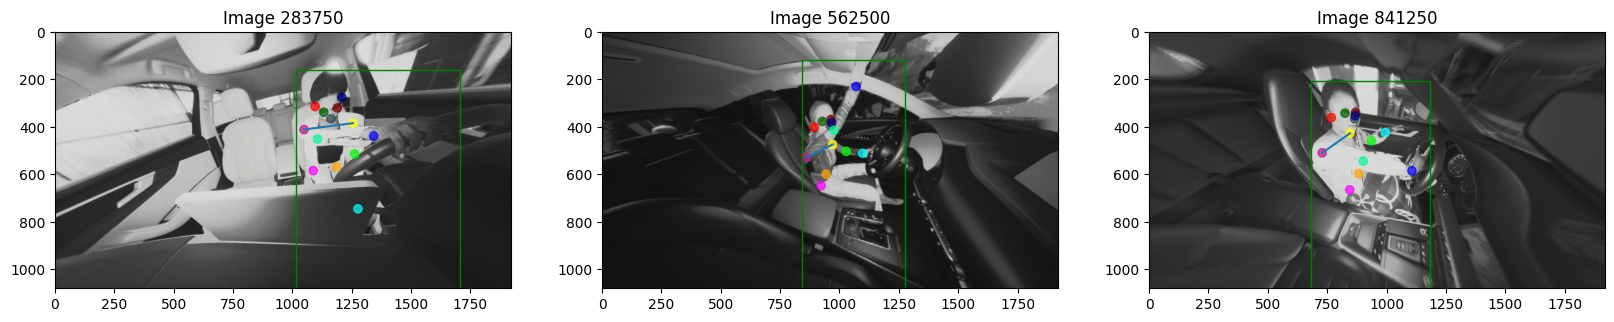

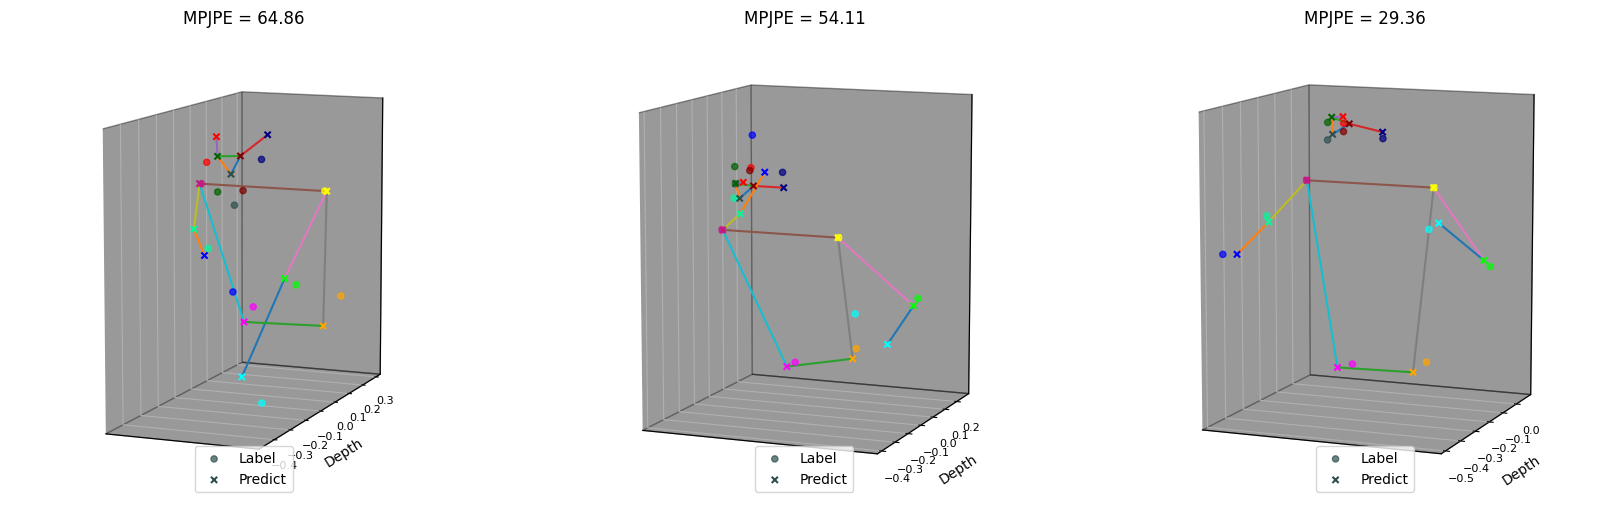

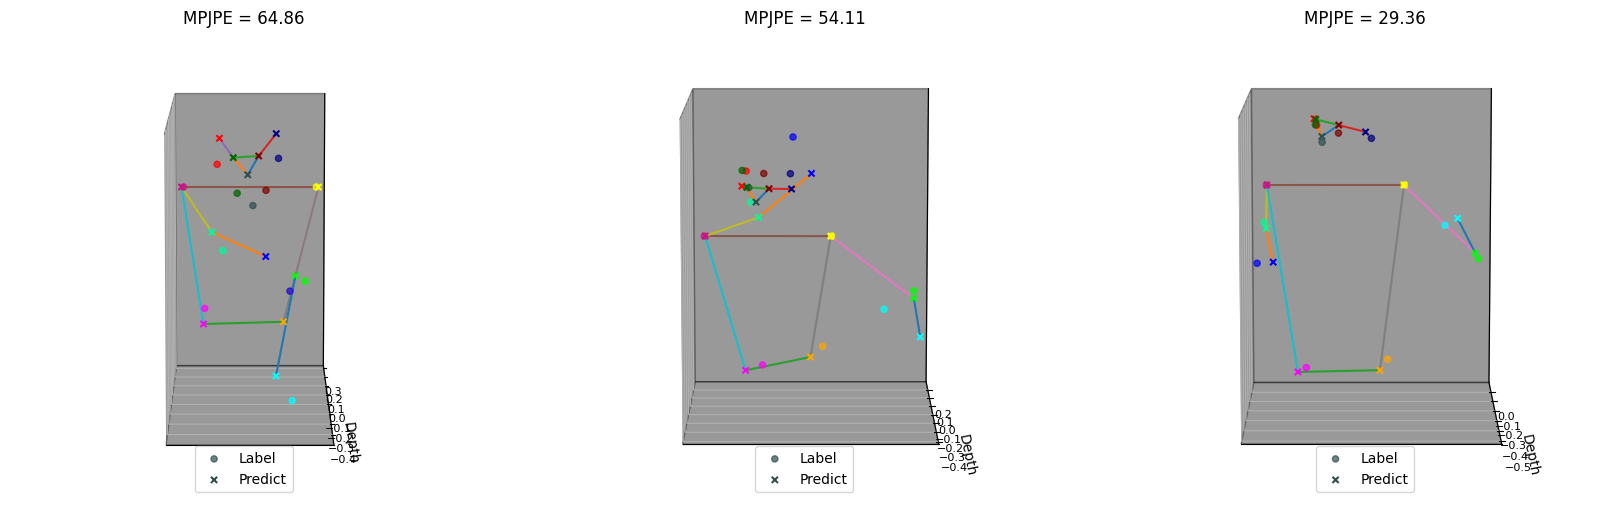

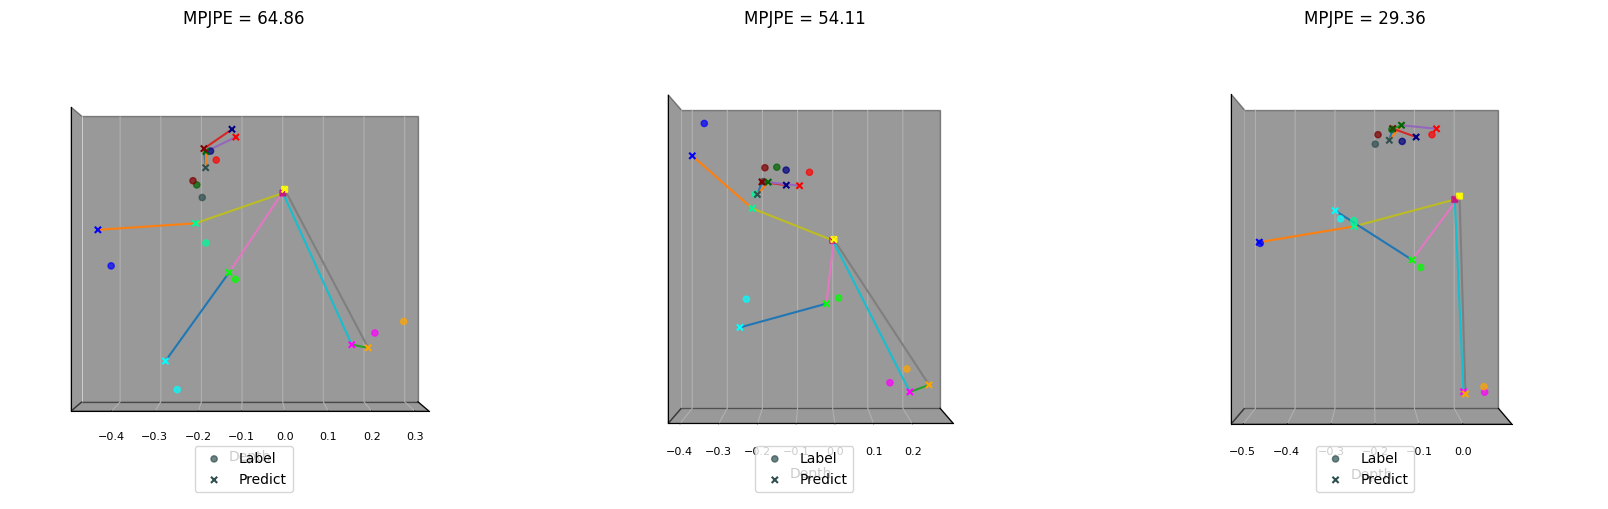

In [12]:
from modules.utils.visualization import (
    plot_samples
)
from pathlib import Path

dataset_length = len(experiment.train_loader.dataset)
plot_samples(
    Path(synthetic_cabin_ir_1m_v2_image_root_path),
    experiment.lit_model,
    experiment.train_loader,
    None,
    img_figsize=(20, 10),
    plot_figsize=(20.5, 10),
    sample_indices=[
        int(dataset_length * 0.1),
        int(dataset_length * 0.5),
        int(dataset_length * 0.9),
    ],
    is_plot_gt_skeleton=False
)

## Test Samples

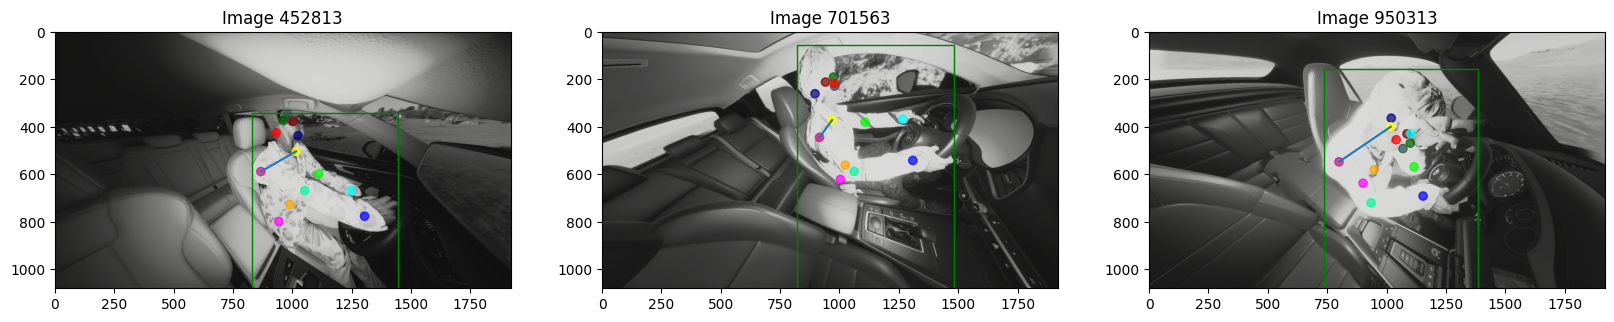

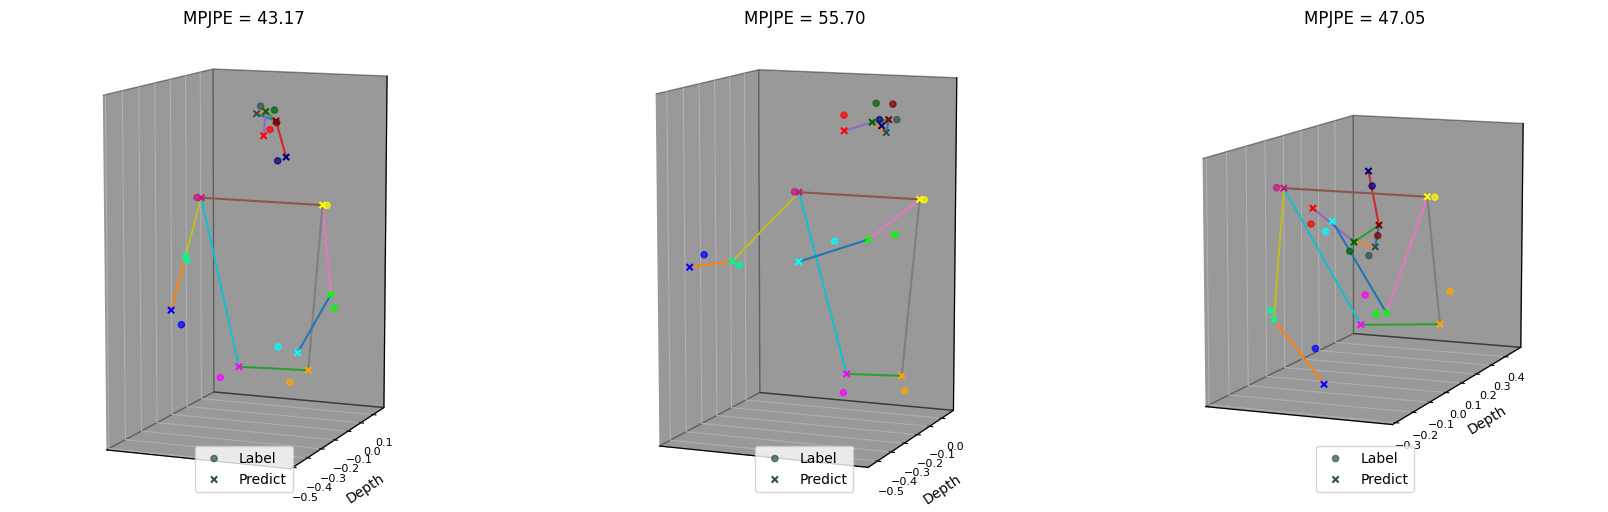

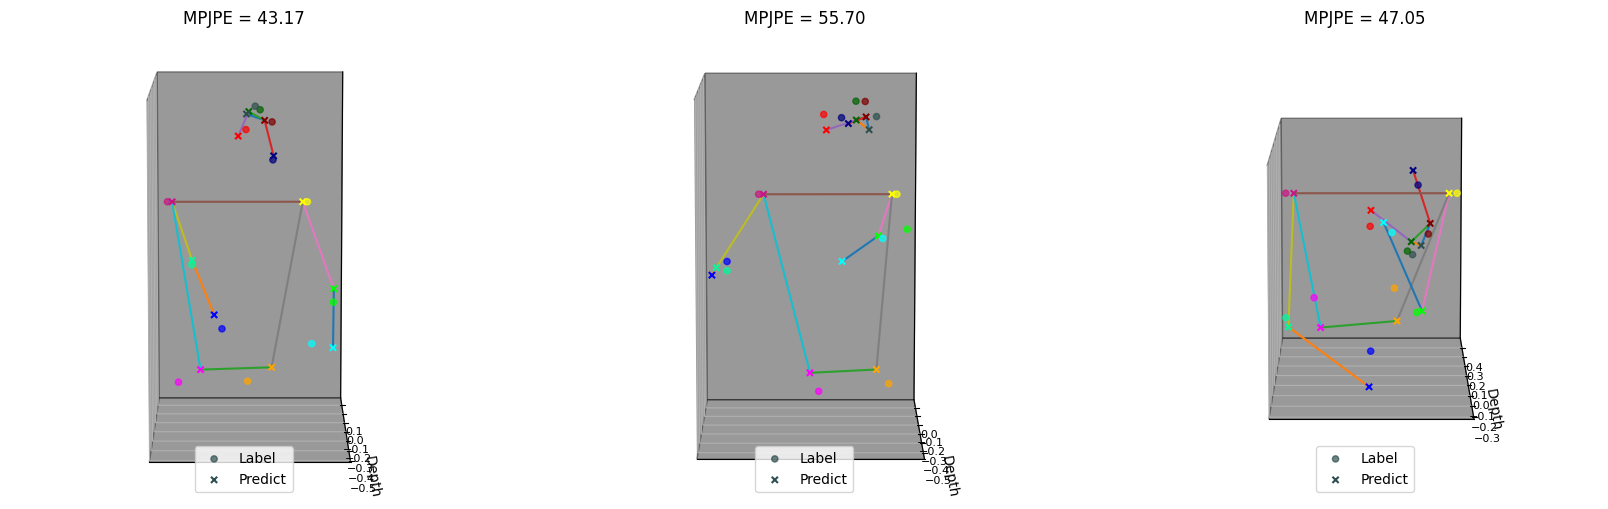

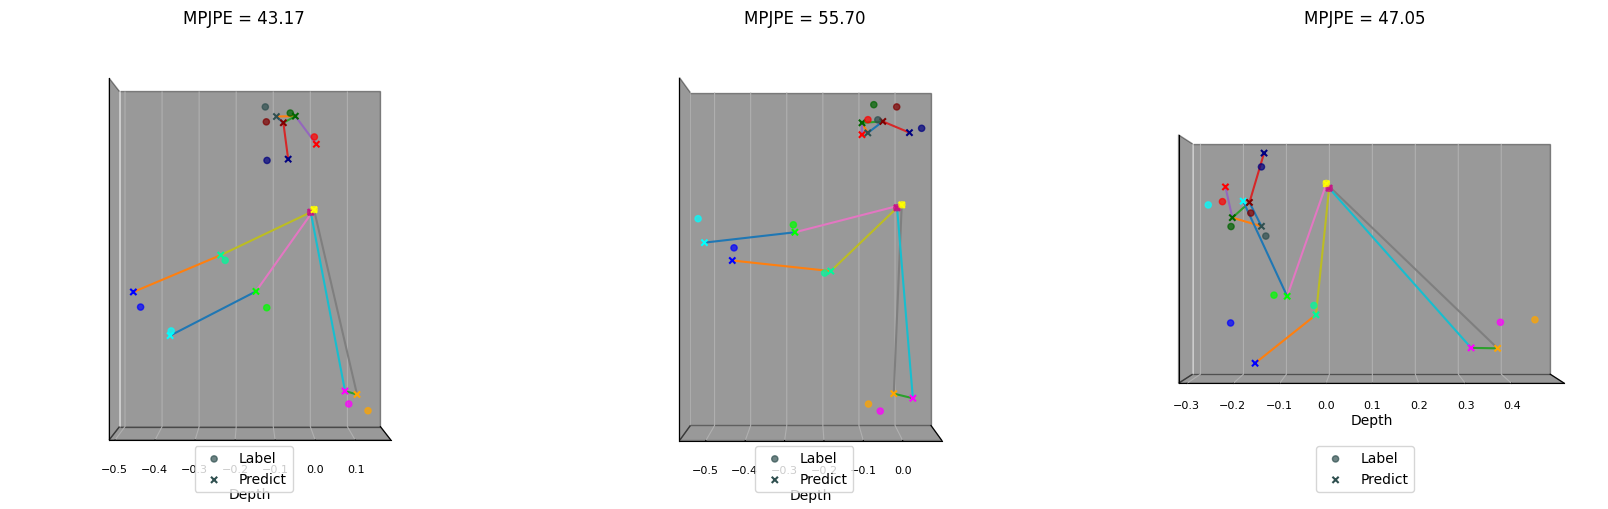

In [13]:
from modules.utils.visualization import (
    plot_samples
)
dataset_length = len(experiment.test_loader.dataset)
plot_samples(
    synthetic_cabin_ir_1m_v2_image_root_path,
    experiment.lit_model,
    experiment.test_loader,
    None,
    img_figsize=(20, 10),
    plot_figsize=(20.5, 10),
    sample_indices=[
        int(dataset_length * 0.1),
        int(dataset_length * 0.5),
        int(dataset_length * 0.9),
    ],
    is_plot_gt_skeleton=False
)